## Линейная регрессия (рассматриваем парную)

Есть наблюдения - пары чисел и есть гипотеза линейной статистической зависимости между x, y.\
Y = a + bx, где неизвесны а и b.\
Построить прямую, чтобы точки лежали более плотно.\
Критерии качества - MSE (Mean Squared Error) среднеквадратическая ошибка\
Регре́ссия — односторонняя стохастическая зависимость, устанавливающая соответствие между случайными переменными.\
Стохастичность означает случайность

In [1]:
import math, random
import matplotlib.pyplot as plt
import math

%matplotlib inline

plt.style.use('dark_background')

Считываем данные

In [2]:
def get_data():
    with open("data.csv") as f:
        mileage = []
        price = []
        for index, line in enumerate(f):
            if index != 0:
                line = line.rstrip("\n").split(",")
                try:
                    mileage.append(int(line[0]))
                    price.append(int(line[1]))
                except:
                    print("Wrong data!")
                    return (0, 0)
    return mileage, price

mileage, price = get_data()

### Корреляция

In [3]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
print("correlation :", correlation(mileage, price))

correlation : -0.856139420790502


### Подгонка методом наименьших квадратов

In [4]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

alpha, beta = least_squares_fit(mileage, price)
print("alpha, beta :", alpha, beta)

alpha, beta : 8499.599649933216 -0.0214489635917023


### Коэффициент детерминации

Коэффициент детерминации R^2 (R-квадрат) — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии в дисперсии зависимой переменной.\
Коэффициент детерминации оценивает долю дисперсии (изменчивости) Y, которая объясняется с помощью X в простой линейной регрессионной модели.\
Коэффициент детерминации - объясняет насколько наша модель лучше простейшей.

In [5]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""

    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

print("Коэффициент детерминации :", r_squared(alpha, beta, mileage, price))

Коэффициент детерминации : 0.7329747078314965


### Метод градиентного спуска

Линейная модель парной регрессии a(x) = Q0 + Q1 * x\
2 параметра : Q0 и Q1\
Функционал ошибки среднеквадратичный\
\
Градиент - вектор составленный из часных производных\
Метод заключается в поиске градиента (вектора часных производных)

In [6]:
def drow(mileage, price, msc):
    plt.scatter(mileage, price)
    plt.plot(mileage, msc)
    plt.ylabel("Price, $")
    plt.xlabel("Mileage, km")
    plt.show()

def estimatet_prise(mileage, theta0, theta1):
    return theta0 + theta1 * mileage

def normalazer(data):
    normal = []
    for i in data:
        normal.append(i / max(data))
    return normal

def get_theta0(mileage, price, theta0, theta1): # Часная производная Q0
    l = len(mileage)
    res = 0
    for i in range(l):
        res += estimatet_prise(mileage[i], theta0, theta1) - price[i]
    return res / l

def get_theta1(mileage, price, theta0, theta1): # Часная производная Q1
    l = len(mileage)
    res = 0
    for i in range(l):
        res += (estimatet_prise(mileage[i], theta0, theta1) - price[i]) * mileage[i]
    return res / l

![](image1.png) 
<img src="attachment:image1.png" width="400">

До сходимости повторяем градиентный шаг.\
Вычисляем из текущего вектора весов градиент ф-и ошибки с шагом learning_rate.\

Number of iterations 2091
Theta0 : 8498.671842673384
Theta1 : -0.021440141168322654


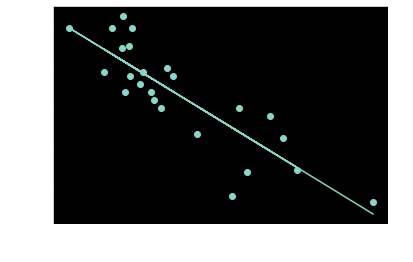

In [7]:
def gradient_descent(mileage, price):
    theta0 = 0 # Инициализация Q0 = Q1 = 0
    theta1 = 0
    learning_rate = 0.1
    i = 10000
    while i: # До сходимости повторяем градиентный шаг
        i -= 1
        tmp_theta0 = learning_rate * get_theta0(mileage, price, theta0, theta1)
        tmp_theta1 = learning_rate * get_theta1(mileage, price, theta0, theta1)
        theta0 -= tmp_theta0
        theta1 -= tmp_theta1
        if abs(tmp_theta0 < 0.000001) and abs(tmp_theta1) < 0.000001:
            break
    print('Number of iterations', 10000 - i)
    return theta0, theta1

mileage, price = get_data()
if type(mileage) == list:
    normal_mileage = normalazer(mileage)
    normal_price = normalazer(price)
    theta0, theta1 = gradient_descent(normal_mileage, normal_price)
    theta0 = theta0 * max(price);
    theta1 = theta1 * (max(price) / max(mileage))
    print('Theta0 :', theta0)
    print('Theta1 :', theta1)
    msc = []
    m = len(mileage)
    for i in range(len(mileage)):
        msc.append(estimatet_prise(mileage[i], theta0, theta1))
    drow(mileage, price, msc)

## Pytorch

In [8]:
import numpy as np
import torch

In [9]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(np.array(mileage) / 10, dtype=torch.float32) ## / 10?
y = torch.tensor(price, dtype=torch.float32)

In [10]:
y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 )

# propagete gradients
loss.backward()

In [11]:
print("dL/dw = {}\n".format(w.grad))
print("dL/db = {}\n".format(b.grad))

dL/dw = tensor([-1.1658e+08])

dL/db = tensor([-12663.6670])



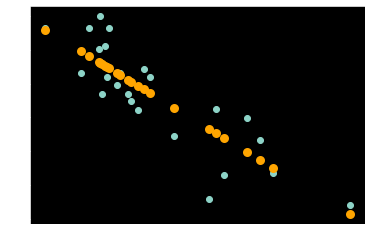

loss =  0.006498851


In [12]:
from IPython.display import clear_output

x = torch.tensor(normalazer(mileage), dtype=torch.float32)
y = torch.tensor(normalazer(price), dtype=torch.float32)

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

for i in range(100):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # Be extremely careful with accessing the .data attribute!
    w.data -= 0.5 * w.grad.data
    b.data -= 0.5 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=3)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.005:
            print("Done!")
            break

In [13]:
theta0 = b * max(price)
theta1 = w * (max(price) / max(mileage))

theta0, theta1

(tensor([8438.3594], grad_fn=<MulBackward0>),
 tensor([-0.0209], grad_fn=<MulBackward0>))

In [14]:
b, w

(tensor([1.0179], requires_grad=True), tensor([-0.6041], requires_grad=True))

## Аналитическое решение

In [15]:
X = np.array((mileage)).reshape(-1,1)
Y = np.array(price).reshape(-1,1)

Добавим член смешения равный 1

In [16]:
X = np.c_[np.ones((X.shape[0], 1)), X]
X.shape

(24, 2)

In [17]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
w

array([[ 8.49959965e+03],
       [-2.14489636e-02]])